In [1]:

import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import ModelSpec, summarize
from matplotlib.pyplot import subplots


In [50]:
dataset = load_data("Carseats")
terms = ["Price", "Urban", "US"]
dataset[terms]

,Price,Urban,US
0,120,Yes,Yes
1,83,Yes,Yes
2,80,Yes,Yes
3,97,Yes,Yes
4,128,Yes,No
...,...,...,...
395,128,Yes,Yes
396,120,No,Yes
397,159,Yes,Yes
398,95,Yes,Yes


In [38]:
X = ModelSpec(terms).fit_transform(dataset)
Y = dataset["Sales"]
results = sm.OLS(Y, X).fit()
print(f"{results.rsquared=}")
print(f"p-values:\n{results.pvalues}")
summarize(results)

results.rsquared=0.23927539218405547
p-values:
intercept     3.626602e-62
Price         1.609917e-22
Urban[Yes]    9.357389e-01
US[Yes]       4.860245e-06
dtype: float64


,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

For all variables other than Urban

In [42]:
# (e) On the basis of your response to the previous question, fit a
# smaller model that only uses the predictors for which there is
# evidence of association with the outcome.

smaller_X = ModelSpec(["Price", "US"]).fit_transform(dataset)
smaller_result = sm.OLS(Y, smaller_X).fit()
print(f"{smaller_result.rsquared=}")
summarize(smaller_result)

smaller_result.rsquared=0.23926288842678567


,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [44]:
# (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

smaller_result.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


Text(0, 0.5, 'Residuals')

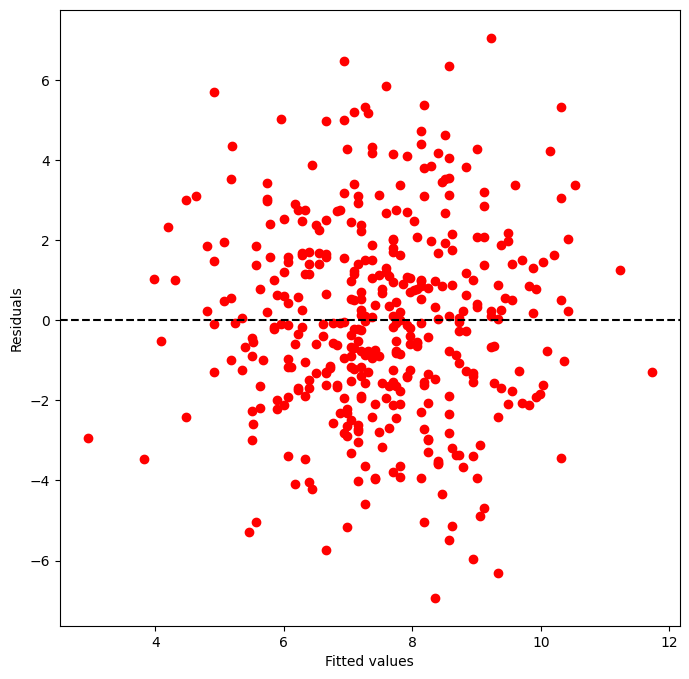

In [51]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(smaller_result.fittedvalues, smaller_result.resid, c="r")
ax.axhline(0, c="k", ls="--")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")


Text(0, 0.5, 'Studentized residuals')

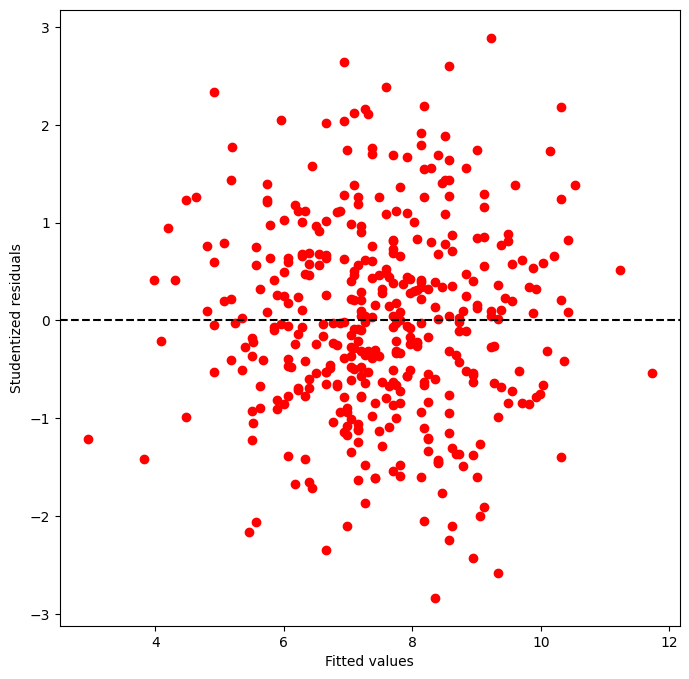

In [54]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(smaller_result.fittedvalues, smaller_result.outlier_test()["student_resid"], c="r")
ax.axhline(0, c="k", ls="--")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Studentized residuals")


Text(0, 0.5, 'US[Yes]')

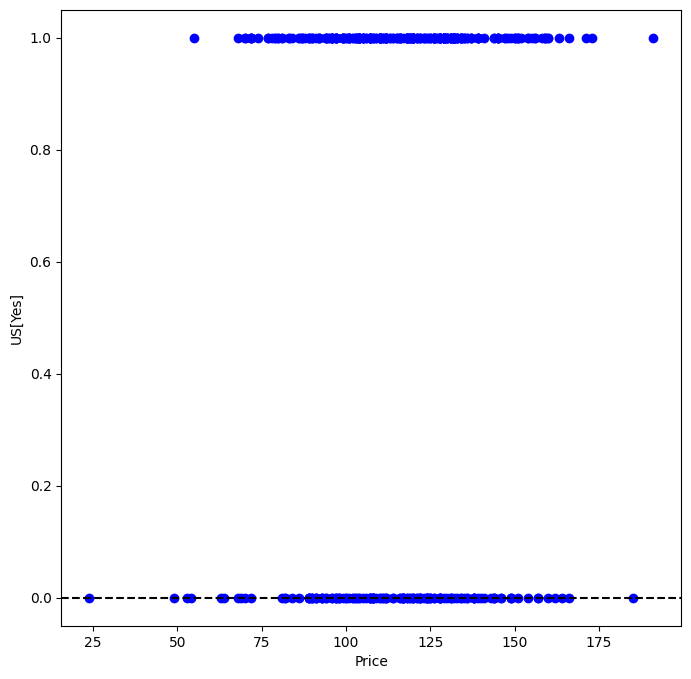

In [66]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(smaller_X["Price"], smaller_X["US[Yes]"], c="b")
ax.axhline(0, c="k", ls="--")
ax.set_xlabel("Price")
ax.set_ylabel("US[Yes]")


## (h) Is there evidence of outliers or high leverage observations in the model from (e)?

- No.